## Black Friday Dataset EDA and Feature Engineering
### Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Problem Statement
A retail company 'ABC Private Limited' wants to understand the customer purchase behaviour (specifically purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics(age,gender etc) product details(product id and product category) and total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the train and test dataset
df_train=pd.read_csv(r'E:\sel\chrome_test_profile\train\train.csv')
df_test=pd.read_csv(r'E:\sel\chrome_test_profile\test\test.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
## merge both train and test data
df = df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
## basic 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
df.drop(['User_ID'], axis =1, inplace = True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
pd.get_dummies(df['Gender'])

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,1,0


In [10]:
# changing Gender values to 0 & 1
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
## Handling Categorical Feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3, '36-45':4, '46-50':5, '51-55':6,'55+':7 })

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
## Fixing Cateogorical Data City Category
df_city = pd.get_dummies(df['City_Category'],drop_first = True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [15]:
df =pd.concat([df,df_city], axis =1)
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [16]:
df.drop('City_Category',axis = 1, inplace = True)


In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [18]:
## Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
## Replace the missing value with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].isnull().sum()

0

In [24]:
## product category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
## Replace the missing value with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [27]:
df['Product_Category_2'].isnull().sum()

0

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [33]:
## Convert object into integers(Stay in Current City years)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [34]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [35]:
## Visualization
sns.pairplot(df)

Error in callback <function flush_figures at 0x000001FBBB70EAF0> (for post_execute):


KeyboardInterrupt: 

C:\Users\Ishu Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age', ylabel='Purchase'>

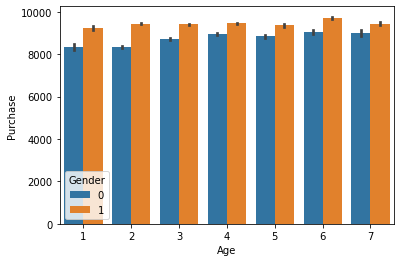

In [47]:
sns.barplot('Age','Purchase',hue = 'Gender', data=df)

## Purchasing of men is higher than women



C:\Users\Ishu Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Occupation', ylabel='Purchase'>

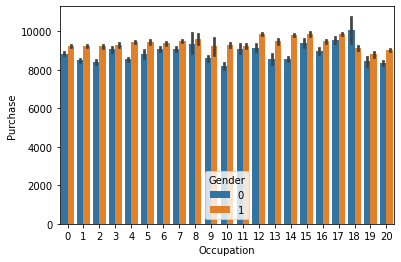

In [37]:
## Visualization of purchase with occupation
sns.barplot('Occupation','Purchase',hue = 'Gender', data=df)

C:\Users\Ishu Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_1', ylabel='Purchase'>

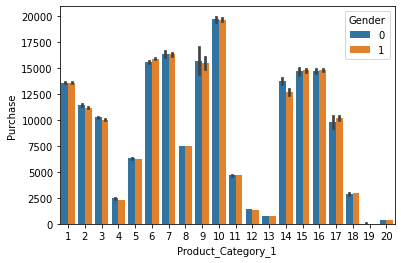

In [38]:
sns.barplot('Product_Category_1','Purchase',hue = 'Gender', data=df)

C:\Users\Ishu Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_2', ylabel='Purchase'>

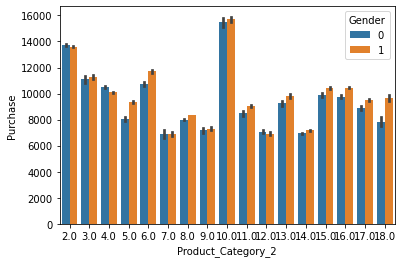

In [39]:
sns.barplot('Product_Category_2','Purchase',hue = 'Gender', data=df)

C:\Users\Ishu Mishra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Product_Category_3', ylabel='Purchase'>

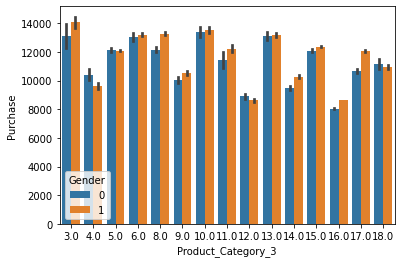

In [40]:
sns.barplot('Product_Category_3','Purchase',hue = 'Gender', data=df)

In [35]:
## Fetaure Scaling
df_test=df[df['Purchase'].isnull()]

In [36]:
df_train=df[~df['Purchase'].isnull()]
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [37]:
X = df_train.drop('Purchase', axis = 1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [38]:
X = X.drop('Product_ID', axis = 1)
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,1,10,2,0,3,8.0,16.0,0,0
1,0,1,10,2,0,1,6.0,14.0,0,0
2,0,1,10,2,0,12,8.0,16.0,0,0
3,0,1,10,2,0,12,14.0,16.0,0,0
4,1,7,16,4,0,8,8.0,16.0,0,1


In [39]:
y = df_train['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.33, random_state = 42)

In [41]:
## Fetaure Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
reg_pred=regression.predict(X_test)

In [48]:
reg_pred

array([11827.531432  , 10472.23195058,  7361.92482116, ...,
       10419.50288826, 11647.9911962 , 10649.86876652])

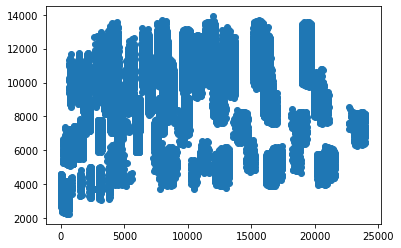

In [49]:
## Plot a scater plot for prediction
plt.scatter(y_test,reg_pred)

In [50]:
residuals = y_test-reg_pred

In [51]:
residuals

84432     7314.468568
72724     5040.768049
197032     440.075179
353704    4890.131920
91198    -4181.046128
             ...     
196106    1760.882891
109474   -3677.223753
433228   -4985.502888
271831    7403.008804
477613    1246.131233
Name: Purchase, Length: 181523, dtype: float64

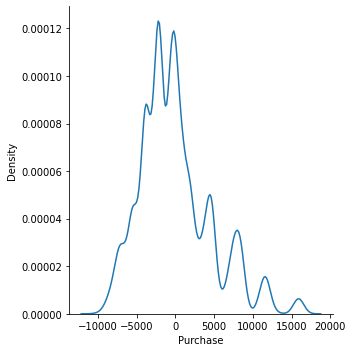

In [52]:
## plot the residuals
sns.displot(residuals,kind="kde")

In [53]:
print(regression.intercept_)

9260.52247622407


In [54]:
print(regression.coef_)

[  219.40340889   161.48399281    40.75197867    13.00328258
   -29.40171369 -1595.03999038    -6.24829968  -421.6489872
    76.37138564   311.82740972]


In [55]:
 #on which parameter the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

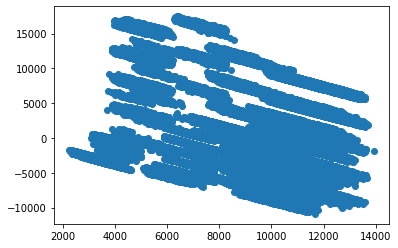

In [56]:
# Scatter plot with respect to prediction and residuals

plt.scatter(reg_pred,residuals)

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

21939163.32153542
3577.2377941856957
4683.9260585042775


In [58]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score)

0.12948768560712398


In [59]:
#display adjusted r square
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.12943972666697723

### Observation
The value of R^2, and adjusted R^2 is very low. This shows that, linear regression model has failed to trained the model in a good way.

## Ridge Regression

In [66]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train, y_train)

Ridge()

In [67]:
rdg_pred=rdg.predict(X_test)

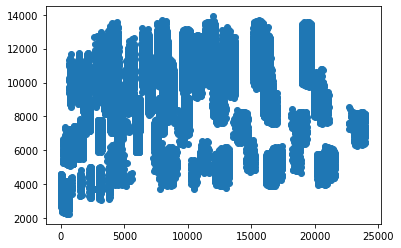

In [68]:
## Plot a scater plot for prediction
plt.scatter(y_test,rdg_pred)

In [70]:
residuals = y_test-rdg_pred
residuals

84432     7314.473840
72724     5040.774905
197032     440.071573
353704    4890.136961
91198    -4181.047359
             ...     
196106    1760.879828
109474   -3677.227674
433228   -4985.500705
271831    7403.013372
477613    1246.135407
Name: Purchase, Length: 181523, dtype: float64

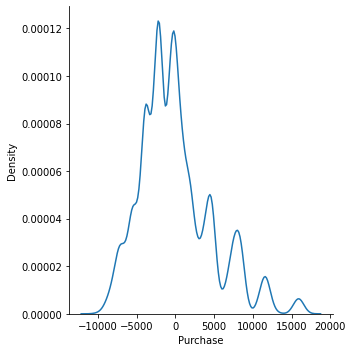

In [71]:
## plot the residuals
sns.displot(residuals,kind="kde")

In [79]:
score1 = r2_score(y_test,rdg_pred)
print(score1)

0.12948769558874385


In [74]:
#display adjusted r square
1-(1-score1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.12943973664914687

### Observation
Didn't observe significant difference in Linear and Ridge Regression

## Lasso Regression

In [75]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)

Lasso()

In [76]:
las_pred=las.predict(X_test)

In [77]:
residuals = y_test-las_pred
residuals

84432     7323.373282
72724     5041.592579
197032     431.732544
353704    4887.108267
91198    -4181.429116
             ...     
196106    1759.391288
109474   -3679.100866
433228   -4983.745746
271831    7407.457721
477613    1244.346264
Name: Purchase, Length: 181523, dtype: float64

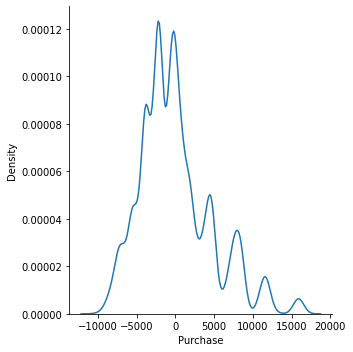

In [78]:
## plot the residuals
sns.displot(residuals,kind="kde")

In [80]:
score2 = r2_score(y_test,las_pred)
print(score2)

0.12948746428725755


In [81]:
#display adjusted r square
1-(1-score2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.12943950533491766

### Observation
Didn't observe significant difference in Linear and Ridge Regression

## Random Forest Regressor

In [76]:
# Train the model

# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

SEED = 42
# Create a Random Forest Regressor
reg = RandomForestRegressor(n_estimators=200, max_depth = 50)

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, n_estimators=200)

In [77]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [78]:
# Model Evaluation
print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

R^2: 0.7879122724181118
Adjusted R^2: 0.787906517515509
MAE: 1666.3658859664506
MSE: 5354190.113810144
RMSE: 2313.9122960497325


In [79]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [80]:
# Model Evaluation
acc_rgb = r2_score(y_test, y_test_pred)
print('R^2:', acc_rgb)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.6298782933410874
Adjusted R^2: 0.6298579023087226
MAE: 2225.3357914144844
MSE: 9328024.93081166
RMSE: 3054.1815484367758


## XG Boost Regressor

In [87]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xgreg = XGBRegressor()

# Train the model using the training sets 
xgreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [88]:
# Model prediction on train data
y_pred = xgreg.predict(X_train)

In [89]:
# Model Evaluation
print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

R^2: 0.6798454348409861
Adjusted R^2: 0.6798367475946219
MAE: 2128.869569586305
MSE: 8082355.481901835
RMSE: 2842.948378339261


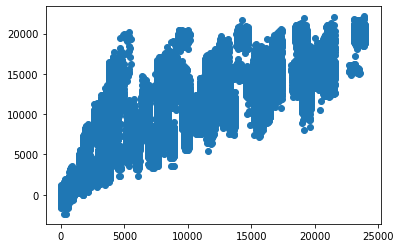

In [90]:
# Visualizing the differences 
plt.scatter(y_train, y_pred)

plt.show()

In [91]:
#Predicting Test data with the model
y_test_pred = xgreg.predict(X_test)

In [92]:
# Model Evaluation
acc_xgb = r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.6669609283904037
Adjusted R^2: 0.666942580343354
MAE: 2166.3205496037485
MSE: 8393446.552897219
RMSE: 2897.1445516054628


## SVM Regressor

In [ ]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svmreg = svm.SVR()
svmreg.fit(X_train, y_train)

In [82]:
# Model prediction on train data
y_pred = svmreg.predict(X_train)

NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Model Evaluation
print('R^2:',r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',mean_absolute_error(y_train, y_pred))
print('MSE:',mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred)))

In [ ]:
#Predicting Test data with the model
y_test_pred = svmreg.predict(X_test)

In [ ]:
# Model Evaluation
acc_svm = r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))